<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/%EB%AF%B8%EB%8B%88%ED%94%8C%EC%A0%9D2_only_lightgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###########다시############3

In [ ]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
X_features = train.drop(columns = 'OC',axis=1)
y_label = train['OC']

X_train,X_test,y_train,y_test = train_test_split(X_features,y_label, test_size = 0.2, random_state = 156)
print(X_train.shape,X_test.shape)

(234, 76) (59, 76)


In [ ]:
print(y_train.value_counts()/y_train.shape[0]*100)
print(y_test.value_counts()/y_test.shape[0]*100)

1   94.44
0    5.56
Name: OC, dtype: float64
1   96.61
0    3.39
Name: OC, dtype: float64


In [ ]:
lgbm_clf1 = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기중단 수행가능
evals = [(X_test, y_test)]
lgbm_clf1.fit(X_train, y_train,
                 early_stopping_rounds=100, eval_metric="logloss",
                 eval_set=evals, verbose=True)
preds1 = lgbm_clf1.predict(X_test)
pred_proba1 = lgbm_clf1.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.152502	valid_0's binary_logloss: 0.152502
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.151453	valid_0's binary_logloss: 0.151453
[3]	valid_0's binary_logloss: 0.150945	valid_0's binary_logloss: 0.150945
[4]	valid_0's binary_logloss: 0.142854	valid_0's binary_logloss: 0.142854
[5]	valid_0's binary_logloss: 0.142807	valid_0's binary_logloss: 0.142807
[6]	valid_0's binary_logloss: 0.143123	valid_0's binary_logloss: 0.143123
[7]	valid_0's binary_logloss: 0.143358	valid_0's binary_logloss: 0.143358
[8]	valid_0's binary_logloss: 0.14373	valid_0's binary_logloss: 0.14373
[9]	valid_0's binary_logloss: 0.141408	valid_0's binary_logloss: 0.141408
[10]	valid_0's binary_logloss: 0.144568	valid_0's binary_logloss: 0.144568
[11]	valid_0's binary_logloss: 0.14458	valid_0's binary_logloss: 0.14458
[12]	valid_0's binary_logloss: 0.143266	valid_0's binary_logloss: 0.143266
[13]	valid_0's binary_logloss: 0.144112	valid_0's 

In [ ]:
get_clf_eval(y_test,preds1,pred_proba1)

오차행렬
[[ 0  2]
 [ 0 57]]
정확도 : 0.9661, 정밀도 : 0.9661, 재현율:1.0000, F1 : 0.9828, AUC : 0.8816


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'num_leaves':[32,64],
    'max_depth':[128, 160], 
    'min_child_samples':[60,100],
    'subsample':[0.8,1]
}

# cv는 3으로 지정
lgbm_gridcv= GridSearchCV(lgbm_clf1, param_grid=params, cv=3)
lgbm_gridcv.fit(X_train, y_train, 
           early_stopping_rounds=30, eval_metric="logloss",
           eval_set=[(X_train, y_train), (X_test, y_test)])
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
print('최고 예측 정확도:{0:4f}'.format(lgbm_gridcv.best_score_))

[1]	valid_0's binary_logloss: 0.21031	valid_0's binary_logloss: 0.21031	valid_1's binary_logloss: 0.152988	valid_1's binary_logloss: 0.152988
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's binary_logloss: 0.207675	valid_0's binary_logloss: 0.207675	valid_1's binary_logloss: 0.156241	valid_1's binary_logloss: 0.156241
[3]	valid_0's binary_logloss: 0.204345	valid_0's binary_logloss: 0.204345	valid_1's binary_logloss: 0.15546	valid_1's binary_logloss: 0.15546
[4]	valid_0's binary_logloss: 0.20124	valid_0's binary_logloss: 0.20124	valid_1's binary_logloss: 0.154772	valid_1's binary_logloss: 0.154772
[5]	valid_0's binary_logloss: 0.199237	valid_0's binary_logloss: 0.199237	valid_1's binary_logloss: 0.157973	valid_1's binary_logloss: 0.157973
[6]	valid_0's binary_logloss: 0.196607	valid_0's binary_logloss: 0.196607	valid_1's binary_logloss: 0.157518	valid_1's binary_logloss: 0.157518
[7]	valid_0's binary_logloss: 0.194176	valid_0's binary_logloss: 0.194176	valid_

light gbm GridSearchCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 60, 'num_leaves': 32, 'subsample': 0.8}

In [ ]:
## 최적파라미터로 학습/예측/평가
lgbm_clf2 =  LGBMClassifier(n_estimators=400, num_leaves=32 ,subsample=0.8, min_child_samples=60,max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf2.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)

preds2 = lgbm_clf2.predict(X_test)
pred2_proba = lgbm_clf2.predict_proba(X_test)[:, 1]

get_clf_eval(y_test,preds2,pred2_proba)

[1]	valid_0's binary_logloss: 0.153974	valid_0's binary_logloss: 0.153974
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.153577	valid_0's binary_logloss: 0.153577
[3]	valid_0's binary_logloss: 0.156645	valid_0's binary_logloss: 0.156645
[4]	valid_0's binary_logloss: 0.15749	valid_0's binary_logloss: 0.15749
[5]	valid_0's binary_logloss: 0.159161	valid_0's binary_logloss: 0.159161
[6]	valid_0's binary_logloss: 0.158552	valid_0's binary_logloss: 0.158552
[7]	valid_0's binary_logloss: 0.161554	valid_0's binary_logloss: 0.161554
[8]	valid_0's binary_logloss: 0.162307	valid_0's binary_logloss: 0.162307
[9]	valid_0's binary_logloss: 0.162015	valid_0's binary_logloss: 0.162015
[10]	valid_0's binary_logloss: 0.164492	valid_0's binary_logloss: 0.164492
[11]	valid_0's binary_logloss: 0.165517	valid_0's binary_logloss: 0.165517
[12]	valid_0's binary_logloss: 0.165942	valid_0's binary_logloss: 0.165942
[13]	valid_0's binary_logloss: 0.163751	valid_0'

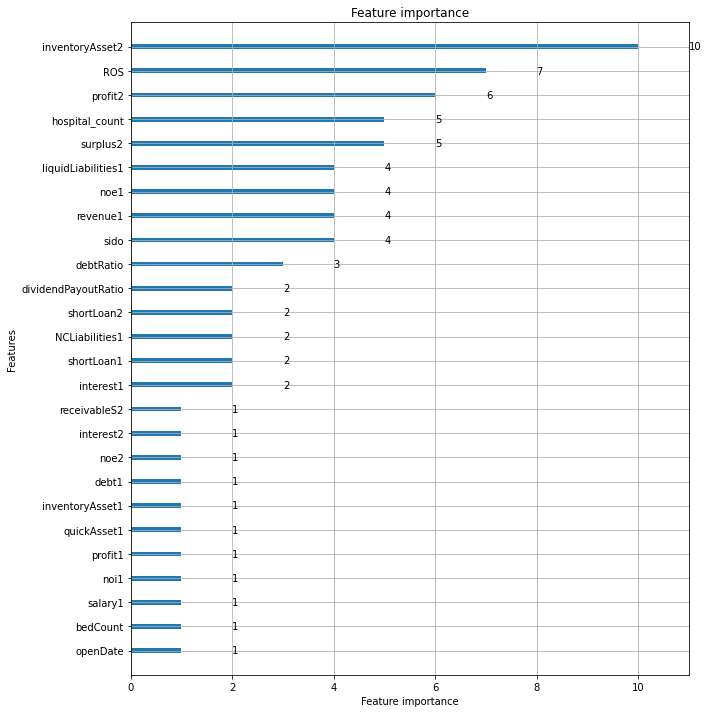

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(lgbm_clf2,ax=ax)